<a href="https://colab.research.google.com/github/SeifKhdija/Bitcoin-and-Stock-Exchanges/blob/main/predicting_the_future_price_of_bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset into a Pandas dataframe
df = pd.read_csv('/kaggle/input/bitcoin-and-stock-exchanges/Dataset.csv')

In [ ]:
# Convert the Date column to a datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Set the Date column as the index of the dataframe
df.set_index('Date', inplace=True)

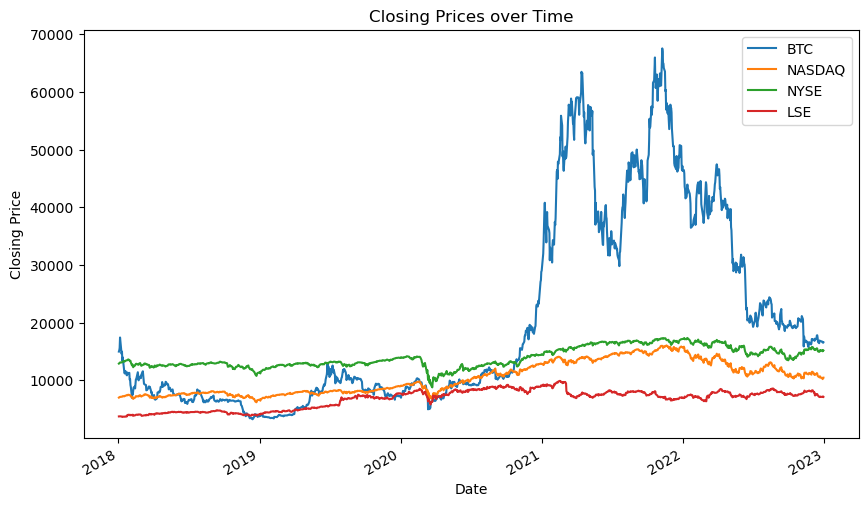

In [ ]:
# Plot the closing prices of Bitcoin, NASDAQ, NYSE, and LSE over time
df[['BTC', 'NASDAQ', 'NYSE', 'LSE']].plot(figsize=(10,6))
plt.title('Closing Prices over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

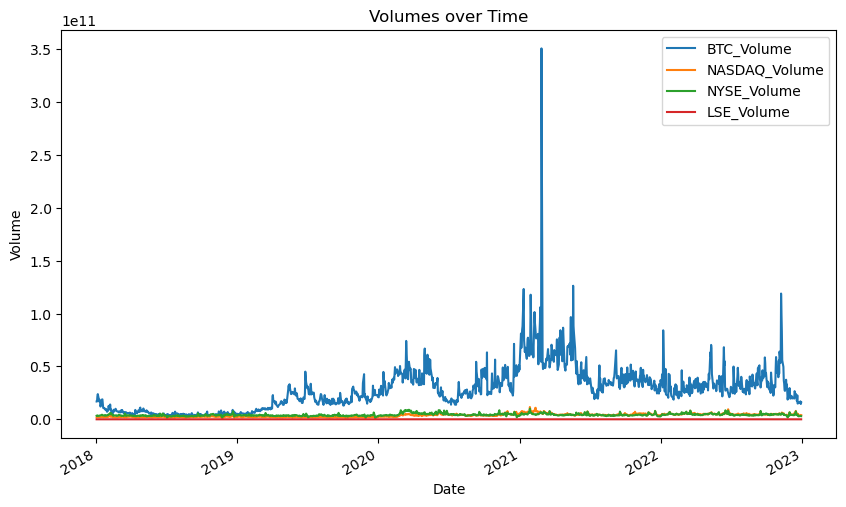

In [ ]:
# Plot the volume of Bitcoin and the three markets over time
df[['BTC_Volume', 'NASDAQ_Volume', 'NYSE_Volume', 'LSE_Volume']].plot(figsize=(10,6))
plt.title('Volumes over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [ ]:
# Calculate the correlation between the closing prices of Bitcoin and the three markets
corr = df[['BTC', 'NASDAQ', 'NYSE', 'LSE']].corr()

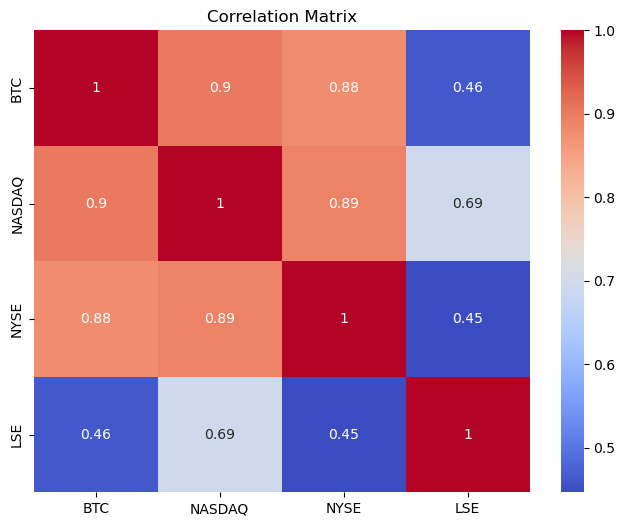

In [ ]:
# Plot the correlation matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(8, 6))
plt.title('Correlation Matrix')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Calculate the correlation between the volumes of Bitcoin and the three markets
corr = df[['BTC_Volume', 'NASDAQ_Volume', 'NYSE_Volume', 'LSE_Volume']].corr()

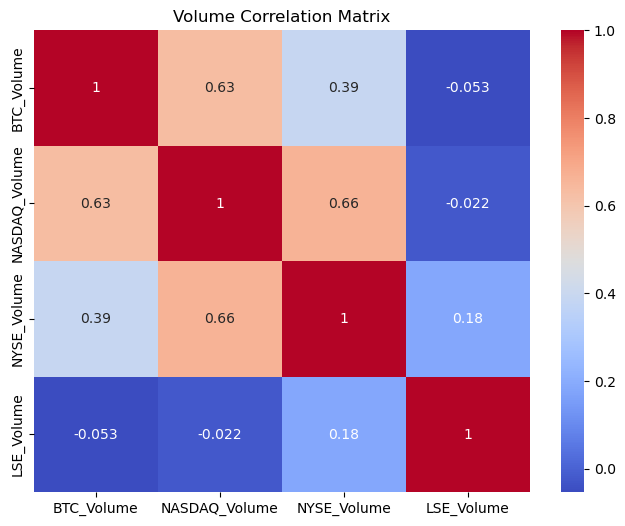

In [ ]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.title('Volume Correlation Matrix')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv('/kaggle/input/bitcoin-and-stock-exchanges/Dataset.csv')

# Convert the Date column to a datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Set the Date column as the index of the dataframe
df.set_index('Date', inplace=True)

# Create a new dataframe containing the closing prices of Bitcoin and the three traditional stock markets
prices_df = df[['BTC', 'NASDAQ', 'NYSE', 'LSE']]

In [ ]:
# Create new features based on lagged and rolling statistics
prices_df['BTC_lag1'] = prices_df['BTC'].shift(1)
prices_df['BTC_lag2'] = prices_df['BTC'].shift(2)
prices_df['BTC_lag3'] = prices_df['BTC'].shift(3)
prices_df['BTC_ma7'] = prices_df['BTC'].rolling(window=7).mean()
prices_df['BTC_ma30'] = prices_df['BTC'].rolling(window=30).mean()
prices_df.dropna(inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
# Define the input features and output variable
X = prices_df.drop('BTC', axis=1)
y = prices_df['BTC']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

Mean Squared Error: 1267526.6186541428
Mean Absolute Error: 618.0775474741939
R-squared: 0.9958303185710788


In [ ]:
# Use the trained model to make predictions on new data
new_data = pd.DataFrame({'NASDAQ': [12345.6], 'NYSE': [6789.0], 'LSE': [3456.7], 
                         'BTC_lag1': [12345.6], 'BTC_lag2': [12345.6], 'BTC_lag3': [12345.6],
                         'BTC_ma7': [12345.6], 'BTC_ma30': [12345.6]})
prediction = model.predict(new_data)
print('Predicted BTC Price:', prediction[0])

Predicted BTC Price: 13228.377540022904
